In [1]:
import GenFunction

In [ ]:
# default setting
from tensorflow import keras

In [2]:
# AMD setting
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
os.environ["PLAIDML_EXPERIMENTAL"] = "1"
os.environ["PLAIDML_DEVICE_IDS"] = "opencl_amd_ellesmere.0"
import keras

Using plaidml.keras.backend backend.


In [3]:
import KerasFunction as K
import VGGModel

In [4]:
K.keras = keras
VGGModel.keras = keras
K.gen_f = GenFunction.mix2image

In [5]:
model = K.make_model()
model.summary()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              102764544 
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4100      
Total params: 121,678,660
Trainable params: 106,963,972
Non-trainable params: 14,714,688
_________________________________________________________________


Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/10
200/200 [==============================] - 315s 2s/step - loss: 1.3418 - acc: 0.6944 - val_loss: 0.5580 - val_acc: 0.7800
Epoch 2/10
200/200 [==============================] - 299s 1s/step - loss: 0.3567 - acc: 0.8622 - val_loss: 0.5102 - val_acc: 0.8100
Epoch 3/10
200/200 [==============================] - 299s 1s/step - loss: 0.2156 - acc: 0.9247 - val_loss: 0.5008 - val_acc: 0.8300
Epoch 4/10
200/200 [==============================] - 299s 1s/step - loss: 0.1925 - acc: 0.9319 - val_loss: 0.4793 - val_acc: 0.8538
Epoch 5/10
200/200 [==============================] - 299s 1s/step - loss: 0.1247 - acc: 0.9522 - val_loss: 0.5225 - val_acc: 0.8650
Epoch 6/10
200/200 [==============================] - 299s 1s/step - loss: 0.1581 - acc: 0.9428 - val_loss: 0.7333 - val_acc: 0.8363
Epoch 7/10
200/200 [==============================] - 299s 1s/step - loss: 0.1013 - acc: 0.9659 - val_loss: 0.6536 - va

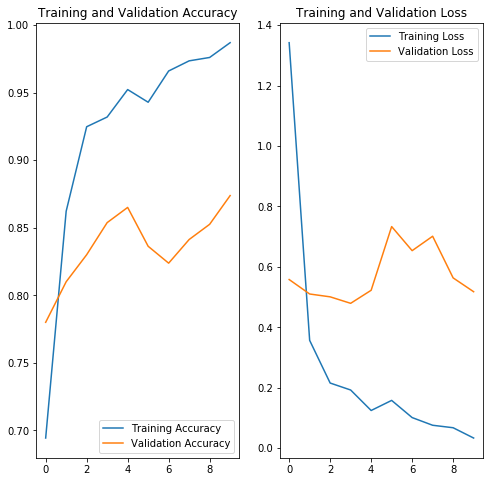

In [6]:
# Make new model with random weights
model = K.make_model()
K.compile_model(model)

# Train model
history = K.train_model(model, train_steps=200, valid_steps=50, epochs=10, view=True)

# Save model
K.save_model("model.h5", model)

In [ ]:
K.view_history(history, epochs=10)

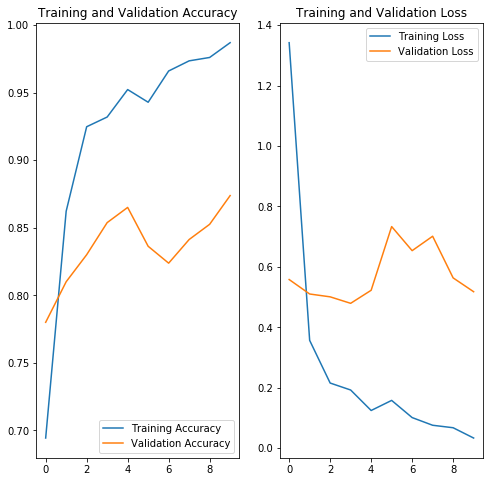

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("b.png")
plt.show()